# **METEHAN DÜNDAR**

In [ ]:
!rm -r AI_USI_MA/
!git clone https://github.com/UmbertoJr/AI_USI_MA.git

Cloning into 'AI_USI_MA'...
remote: Enumerating objects: 430, done.
remote: Counting objects: 100% (165/165), done.
remote: Compressing objects: 100% (126/126), done.
remote: Total 430 (delta 67), reused 126 (delta 35), pack-reused 265
Receiving objects: 100% (430/430), 14.31 MiB | 26.99 MiB/s, done.
Resolving deltas: 100% (197/197), done.


# The Orienteering Problem with Time Windows

column of X:

0. index of the customer
1. x coordinate
2. y coordinate
3. lower time window
4. uppper time window
5. reward customer
6. global time constraint

adj is the distance matrix

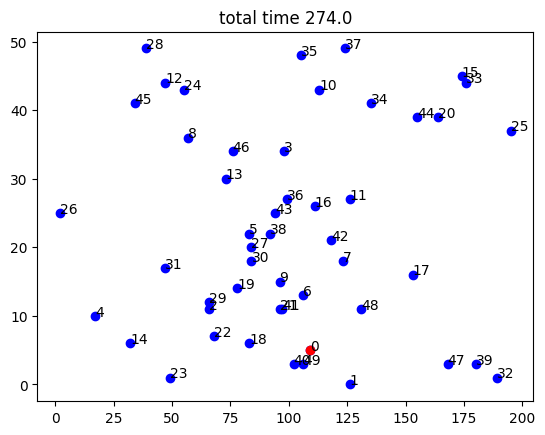

[[0.00e+00 1.09e+02 5.00e+00 0.00e+00 2.74e+02 0.00e+00 2.74e+02]
 [1.00e+00 1.26e+02 0.00e+00 2.13e+02 2.32e+02 1.70e-01 2.74e+02]
 [2.00e+00 6.60e+01 1.10e+01 2.31e+02 2.31e+02 4.00e-01 2.74e+02]
 [3.00e+00 9.80e+01 3.40e+01 1.31e+02 1.69e+02 2.90e-01 2.74e+02]
 [4.00e+00 1.70e+01 1.00e+01 1.82e+02 1.82e+02 8.40e-01 2.74e+02]]
(50, 7)
(50, 50)


In [ ]:
import numpy as np
from AI_USI_MA.OPTW import Env, plot_instance

env = Env(from_file=True, instance_number=0)
X = np.array(env.x)
adj = env.adj
plot_instance(X)
print(X[:5])
print(X.shape)
print(adj.shape)

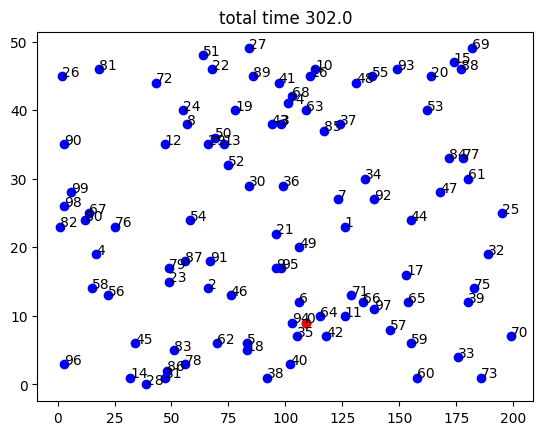

[[0.00e+00 1.09e+02 9.00e+00 0.00e+00 3.02e+02 0.00e+00 3.02e+02]
 [1.00e+00 1.26e+02 2.30e+01 2.06e+02 2.25e+02 2.00e-01 3.02e+02]
 [2.00e+00 6.60e+01 1.40e+01 4.00e+01 7.10e+01 3.80e-01 3.02e+02]
 [3.00e+00 9.80e+01 3.80e+01 1.17e+02 1.49e+02 2.80e-01 3.02e+02]
 [4.00e+00 1.70e+01 1.90e+01 2.09e+02 2.09e+02 8.20e-01 3.02e+02]]
(100, 7)
(100, 100)


In [ ]:
env = Env(from_file=True, instance_number=1)
X = np.array(env.x)
adj = env.adj
plot_instance(X)
print(X[:5])
print(X.shape)
print(adj.shape)

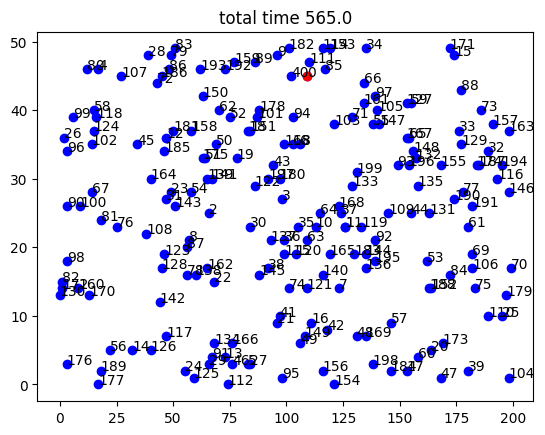

[[0.00e+00 1.09e+02 4.50e+01 0.00e+00 5.65e+02 0.00e+00 5.65e+02]
 [1.00e+00 1.26e+02 2.30e+01 1.41e+02 1.78e+02 2.50e-01 5.65e+02]
 [2.00e+00 6.60e+01 2.50e+01 5.18e+02 5.18e+02 4.10e-01 5.65e+02]
 [3.00e+00 9.80e+01 2.70e+01 2.40e+01 7.10e+01 1.90e-01 5.65e+02]
 [4.00e+00 1.70e+01 4.60e+01 4.73e+02 4.73e+02 8.00e-01 5.65e+02]]
(200, 7)
(200, 200)


In [ ]:
env = Env(from_file=True, instance_number=2)
X = np.array(env.x)
adj = env.adj
plot_instance(X)
print(X[:5])
print(X.shape)
print(adj.shape)

### check if solution is feasible and print it

In [ ]:
env.adj[49, 18]

39

In [ ]:
X[18]

array([1.80e+01, 8.30e+01, 3.70e+01, 3.86e+02, 4.12e+02, 2.40e-01,
       5.65e+02])

time window violated 225.0 
current time  233.0 
from node 1  to  49
(233.0, 0, False)


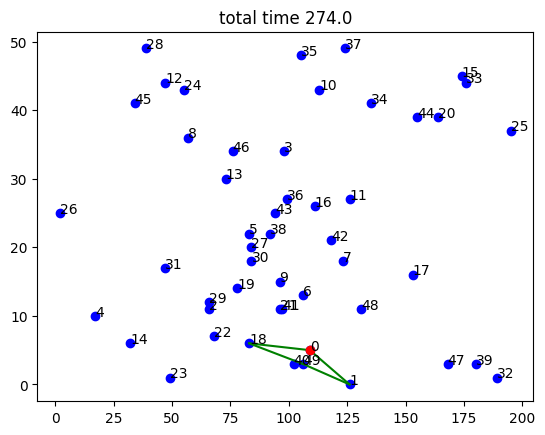

In [ ]:
sol = [0, 1, 49, 18, 0]
env = Env(from_file=True, instance_number=0, verbose=True)
print(env.check_solution(sol))
plot_instance(env.x, sol)

(236.0, 0.44999999999999996, True)


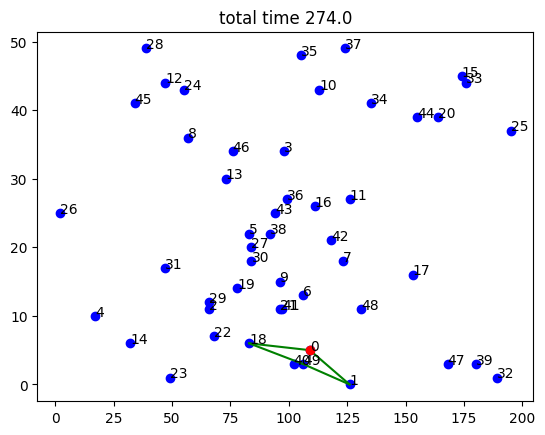

In [ ]:
sol = [0, 18, 49, 1, 0]
env = Env(from_file=True, instance_number=0, verbose=True)
print(env.check_solution(sol))
plot_instance(env.x, sol)

# Monte Carlo Tree Search

### Node class for the Tree Search


In [ ]:
### Node Object ###
class Node:
    def __init__(self, parent, node, travel_time, partial_path, current_reward, expandable_customers):
      self.parent = parent                                                      # parent node object
      self.node = node                                                          # current node (or customer) index
      self.partial_path = partial_path                                          # current partial path across customers
      self.current_reward = current_reward                                      # current reward collected in the partial path
      self.num_of_visit = 0                                                     # number of visit to the current node during the MCTS
      self.terminal = False                                                     # boolean to determine if node is terminal
      self.fully_expanded = False                                               # boolean to determine if node was expanded completely during the search
      self.estimated_reward = 0                                                 # esteem of the future reward collected thanks to the MC simulations
      self.travel_time = travel_time                                            # travel time spent with the current partial path
      self.score = None                                                         # Upper Confidence Buond score for node
      self.policy = None                                                        # IMPORTANT !!!!! Best node index according to the UCB score
      self.expandables = copy.deepcopy(expandable_customers)                    # customers in the candidate list of the current node that are not in the current path
      self.expanded = {}                                                        # nodes already expanded during the search
      if len(self.expandables) == 0:
        self.fully_expanded = True
        self.terminal = True
        self.partial_path.append(0)
        self.policy = 0

    def calculateUCTscore(self, best_reward_so_far):
      # computes the Upper Confidence Bound for the Node
      c=1/(2**0.5)
      self.score = (((self.estimated_reward/ self.num_of_visit) + self.current_reward) /
                    best_reward_so_far) + c * 2 * (2 * np.log(self.parent.num_of_visit) /
                                                   self.num_of_visit) ** 0.5


### MCTS

In [ ]:
from time import time
import copy
import numpy as np
from scipy.special import softmax
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')


class MCTS:
  def __init__(self, env,time_limit, initial_path):
    self.num_of_customers = env.n_nodes                                         # number of customers in the current problem
    self.env = env                                                              # environment of the problem to solve
    self.time_limit = time_limit                                                # time budget for the OPTW to solve
    self.initial_path = initial_path                                            # initial path
    self.root_node = initial_path[-1]                                           # root node index

    # saving the best tour so far, its reward and time travel
    self.best_tour_so_far = initial_path + [0]
    travel_time, self.max_reward, _ = self.env.check_solution(self.best_tour_so_far)

    # these operations find the promising CL for the root node
    ordered_view = {i: self.env.x[i, 5]/(self.env.x[i, 3] / self.env.x[i, 6]) for i in range(1, self.num_of_customers) if i not in initial_path
                    and self.env.adj[self.root_node, i] + travel_time < self.env.x[i, 4]
                    and self.env.adj[i, 0] + self.env.adj[self.root_node, i] + travel_time < self.env.x[i, 6]}
    ordered_list = [k for k, v in sorted(ordered_view.items(), key=lambda item: item[1]) if k not in initial_path]

    # initialize the root node
    self.root = Node(parent=None,
                     node= self.root_node,
                     travel_time =travel_time,
                     partial_path=initial_path,
                     current_reward=0,
                     expandable_customers = ordered_list)


  def treePolicy(self, node):
    """
    This function expand a node if the selected node is not being completely expanded,
    otherwise it select the best child in the Tree using the selectBestChild function
    """
    while not node.terminal:
      if not node.fully_expanded:
        return self.expand(node)
      else:
        node = self.selectBestChild(node)
    return node


  def selectBestChild(self, node):
    """
    The function updates the UBC score for each child node by employing the updated max_reward
    then it returns the best child according to such score.
    """
    best_score = 0
    best_child = None
    for child in node.expanded.values():
      child.calculateUCTscore(self.max_reward)
      if child.score > best_score:
        best_score = child.score
        best_child = child
    return best_child


  def expand(self, node):
    new_node = node.expandables.pop()                                           # it selects the most promising node from the CL
    new_path = copy.deepcopy(node.partial_path)                                 # it copies the path and append new node to it
    new_path.append(new_node)

    new_reward = node.current_reward                                            # update of the reward for the new customer
    new_reward += self.env.x[new_node, 5]

    new_travel_time = max(node.travel_time + self.env.adj[node.node, new_node], # updated the travel time
                          self.env.x[new_node, 3])

    # these operations find the promising CL for the root node
    ordered_view = {i: self.env.x[i, 5]/(self.env.x[i, 3] / self.env.x[i, 6]) for i in range(1, self.num_of_customers) if i not in new_path
                    and self.env.adj[new_node, i] + new_travel_time < self.env.x[i, 4]
                    and self.env.adj[i, 0] + self.env.adj[new_node, i] + new_travel_time < self.env.x[i, 6]}
    ordered_list = [k for k, v in sorted(ordered_view.items(), key=lambda item: item[1]) if k not in new_path]

    new_node_object = Node(parent=node,
                           node=new_node,
                           travel_time=new_travel_time,
                           partial_path=new_path,
                           current_reward=new_reward,
                           expandable_customers=ordered_list)

    node.expanded[new_node] = new_node_object
    if len(node.expandables) == 0:
      node.fully_expanded = True

    if new_node == 0:
      new_node_object.terminal = True
      _, new_r, _ = self.env.check_solution(new_path)
      if new_r > self.max_reward:
        self.max_reward = new_r
        self.best_tour_so_far = new_path

    return new_node_object


  def defaultPolicy(self, starting_node):
    # reach the end, break condition
    if starting_node.node == 0:
      return 0

    customer = starting_node.node
    new_path = starting_node.partial_path
    travel_time = starting_node.travel_time
    while customer != 0:
      # these operations find the promising CL for the root node
      ordered_view = {i: (self.env.x[i, 5] + np.finfo(float).eps)/(self.env.x[i, 3] / self.env.x[i, 6] + np.finfo(float).eps ) for i in range(1, self.num_of_customers) if i not in new_path
                      and self.env.adj[customer, i] + travel_time < self.env.x[i, 4]
                      and self.env.adj[i, 0] + self.env.adj[customer, i] + travel_time < self.env.x[i, 6]}
      ordered_list = [k for k, v in sorted(ordered_view.items(), key=lambda item: -item[1]) if k not in new_path]
      if len(ordered_list) == 0:
        customer = 0
      else:
        probabilities = softmax(np.array([v for k, v in sorted(ordered_view.items(), key=lambda item: -item[1]) if k not in new_path]))
        customer = int(np.random.choice(ordered_list, 1, p=probabilities))

      new_path.append(customer)
      travel_time = max(travel_time + self.env.adj[new_path[-2], customer], self.env.x[customer, 3])

    _, new_r, _ = self.env.check_solution(new_path)
    if new_r > self.max_reward:
        self.max_reward = new_r
        self.best_tour_so_far = new_path

    return new_r - starting_node.current_reward


  def backup(self, node, reward_esteem):
    """
    backup of the estimated reward in the MCTS
    """
    while node is not None:
      node.num_of_visit += 1
      node.estimated_reward += reward_esteem
      node = node.parent
    pass


  def step(self, num_of_simulation=1):
    start = time()
    while time() - start < self.time_limit:
        current_node = self.treePolicy(self.root)
        reward_esteem = self.defaultPolicy(current_node)
        self.backup(current_node, reward_esteem)

    return self.root.policy if self.root.policy != None else 0

Instance: 0, Seed: 0
Solution: (0, 0.0, True)


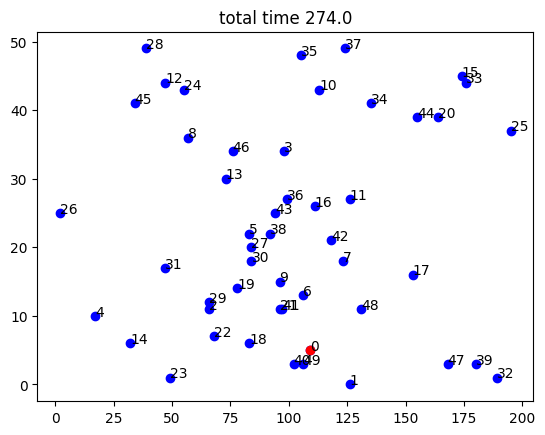

Best Solution: (274.0, 1.4900000000000002, True)


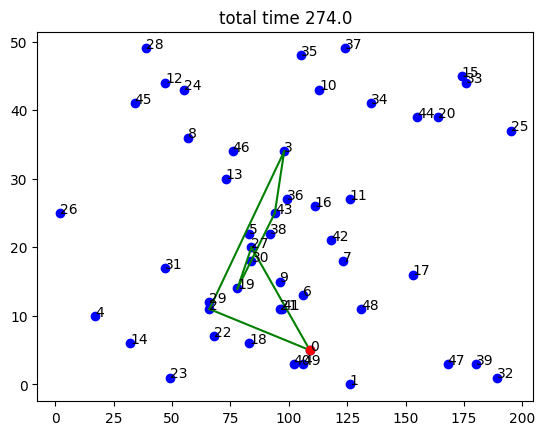

Instance: 0, Seed: 1
Solution: (0, 0.0, True)


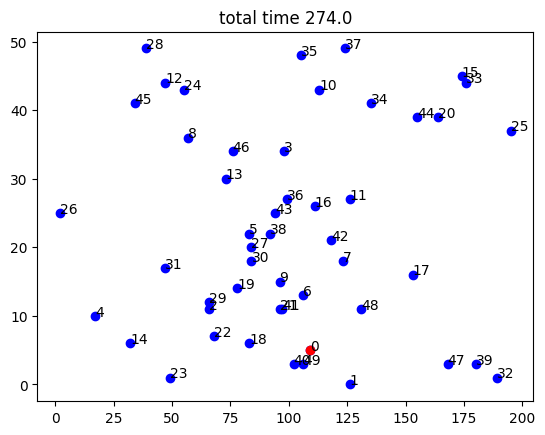

Best Solution: (274.0, 2.04, True)


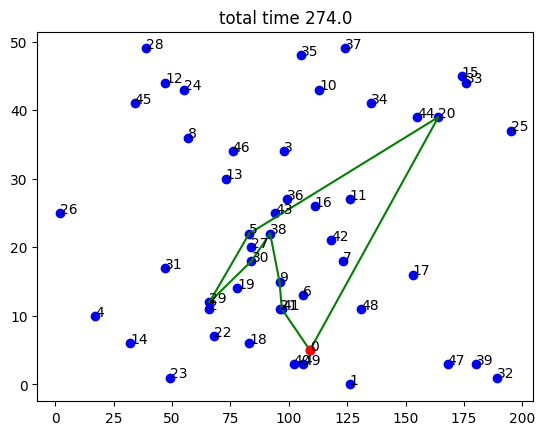

Instance: 0, Seed: 2
Solution: (0, 0.0, True)


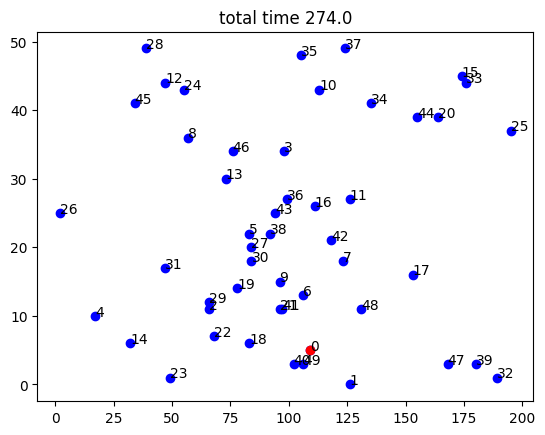

Best Solution: (274.0, 1.83, True)


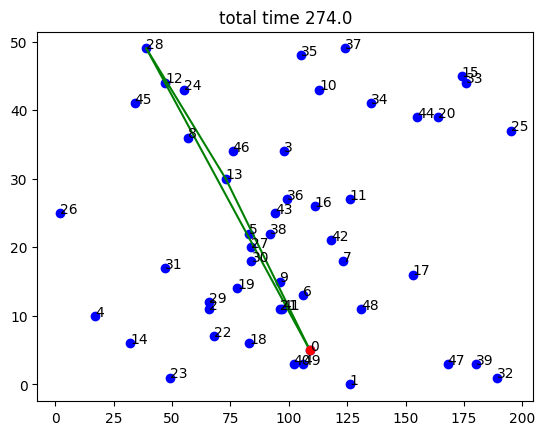

Instance: 1, Seed: 0
Solution: (0, 0.0, True)


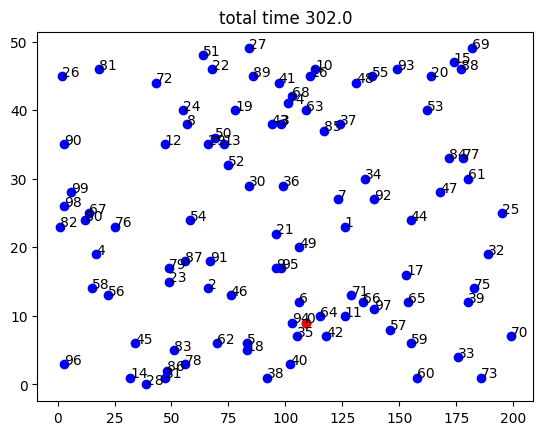

Best Solution: (302.0, 1.46, True)


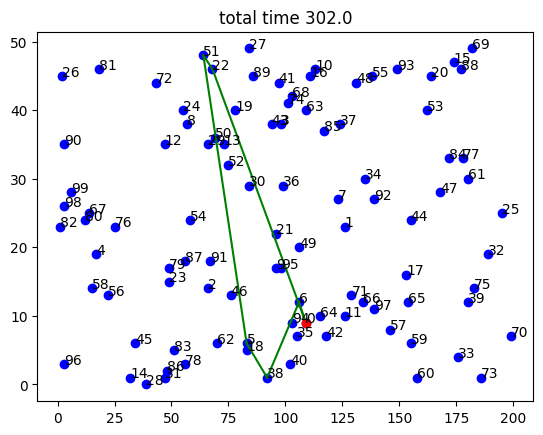

Instance: 1, Seed: 1
Solution: (0, 0.0, True)


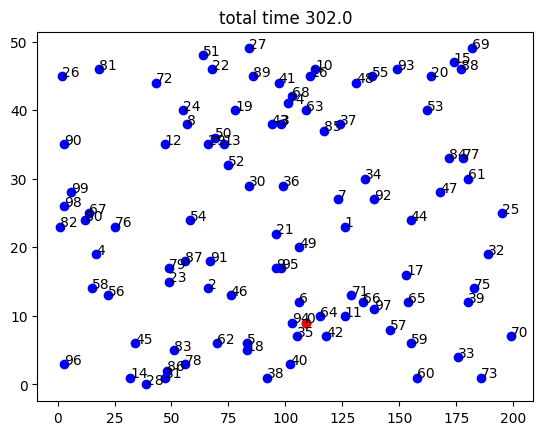

Best Solution: (302.0, 1.64, True)


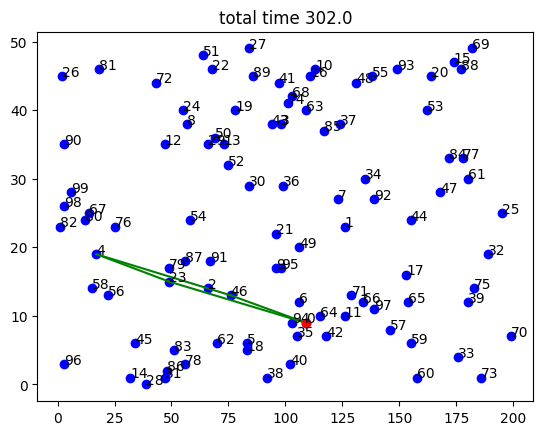

Instance: 1, Seed: 2
Solution: (0, 0.0, True)


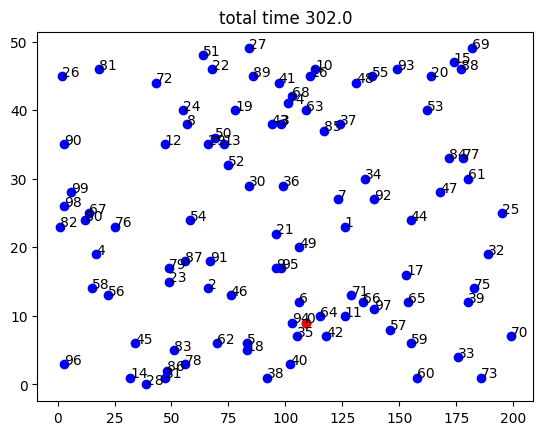

Best Solution: (302.0, 1.35, True)


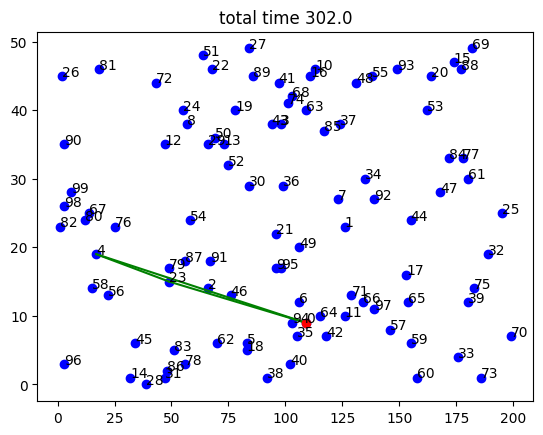

Instance: 2, Seed: 0
Solution: (0, 0.0, True)


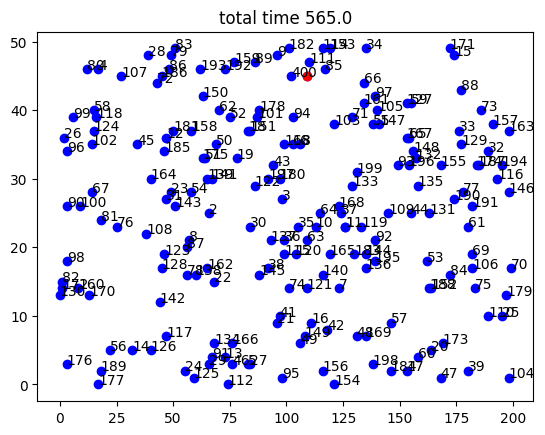

Best Solution: (565.0, 2.41, True)


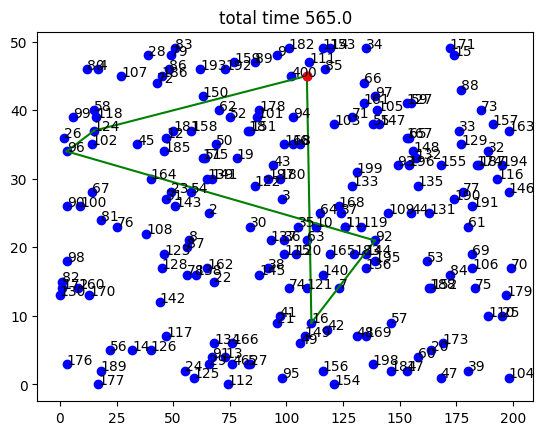

Instance: 2, Seed: 1
Solution: (0, 0.0, True)


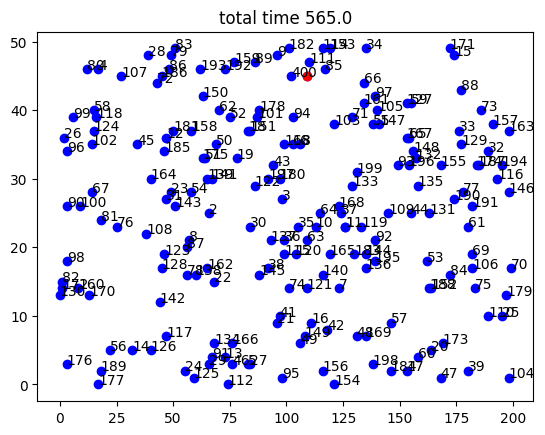

Best Solution: (565.0, 3.09, True)


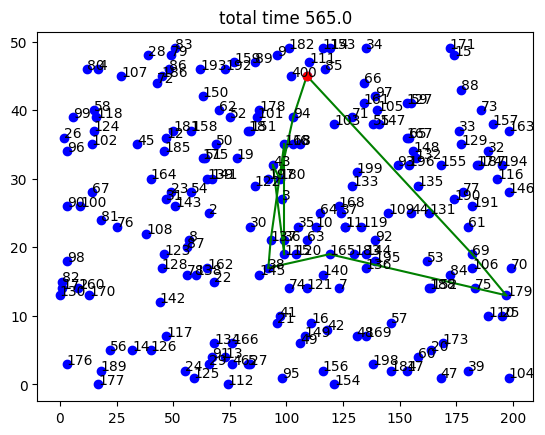

Instance: 2, Seed: 2
Solution: (0, 0.0, True)


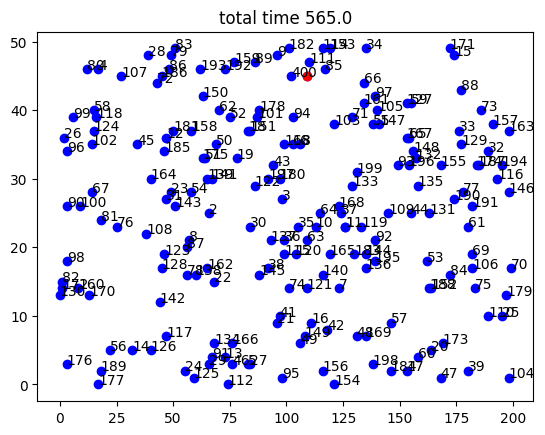

Best Solution: (565.0, 2.79, True)


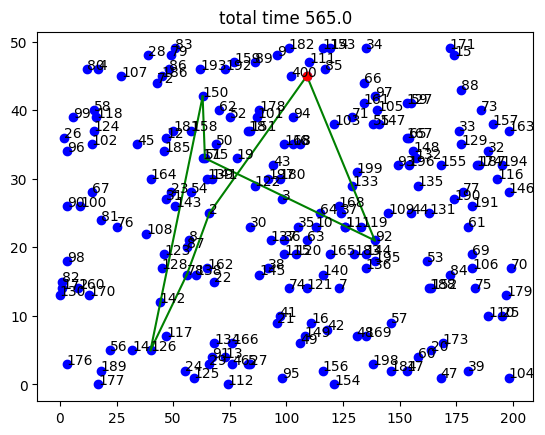

In [ ]:
import random

if __name__ == "__main__":
  seeds = [0, 1, 2]  # Replace with your desired seed values
  instance_numbers = [0, 1, 2]  # Replace with your desired instance numbers

  for instance_number in instance_numbers:
    for seed in seeds:
      print(f"Instance: {instance_number}, Seed: {seed}")
      env = Env(from_file=True, instance_number=instance_number)
      time_limit = 5
      sol = [0]
      best_sol = None
      best_r = 0
      np.random.seed(seed)
      random.seed(seed)
      while True:
        mcts = MCTS(env, time_limit, sol)
        mcts.best_tour_so_far = best_sol
        mcts.max_reward = best_r
        new_customer = mcts.step()
        # print("a new customer is", new_customer)
        sol.append(new_customer)
        if mcts.max_reward > best_r:
          best_r = mcts.max_reward
          best_sol = mcts.best_tour_so_far
        if sol[-1] == 0:
          break


      print("Solution:", env.check_solution(sol))
      plot_instance(env.x, sol)
      print("Best Solution:", env.check_solution(best_sol))
      plot_instance(env.x, best_sol)

# **Discussion**
*   **Tour Time Consistency:** The tour timings for each instance are consistent across different seeds, indicating that the MCTS is stable in terms of the time component for that instance.

*   **Reward Variation:** The total reward varies across seeds for the same instance. This implies that, while the MCTS may consistently discover solutions in a timely manner, the quality of the answer in terms of rewards might vary. This is to be expected in Monte Carlo methods, where randomness might result in various exploration pathways and conclusions.

*   **Feasibility:** All of the solutions are feasible, indicating that MCTS is effectively adhering to the OPTW restrictions.

*   **Instance Difficulty:** There is a substantial increase in tour time from Instance 0 to Instance 2, about doubling. This suggests that Instance 2 is substantially more difficult, or that it has a wider search space or shorter time periods, resulting in lengthier tours.

*   **Best Seed Performance:** We can determine which seed resulted in the highest overall reward inside each instance. In Instance 2, for example, Seed 1 produced the highest reward, implying that the random seed in this case resulted in a superior exploration of the solution space.

*   **Overall Evaluation:** MCTS appears to be capable of managing the OPTW while maintaining a decent balance between tour length and reward maximisation. However, the system may benefit from further altering in order to decrease reward variability and handle more complicated examples more successfully.

# **Next Steps**

* **Parameter Optimization**: The exploration parameter **(c)** in the **calculateUCTscore** function might be tuned to improve exploration/exploitation balance. We can consider making this a dynamic parameter that adjusts based on the search's progress.

* **Reward Normalization**: When there are outliers or considerable fluctuations in the rewards, normalising the rewards in the UCT computation may help to stabilise the search.

* **Pruning**: Including a pruning technique to remove unpromising branches early in the search process might save computing resources and focus the search on more promising sections of the search tree.

* **Heuristics**: Incorporating problem-specific heuristics into the selection and expansion phases might help more effectively guide the search.

* **Parallelization**: Running simulations in parallel could significantly speed up the search process.

* **Stopping Criteria**: Implementing more sophisticated stopping criteria based on convergence of the solution rather than a fixed time limit might lead to better solutions.

* **Local Search Integration**: After the MCTS has produced a solution, using a local search approach (such as 2-opt or 3-opt for TSP) might increase the solution quality even more.
